In [2]:
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from utils.data import get_hsm_dataset, get_solar_energy_dataset, get_fuel_prices_dataset, get_passengers_dataset, log_returns, inverse_log_returns, get_dataset_iterator
from utils.visualization import visualization

In [3]:
hsm_dataset_dir = Path("data/huge_stock_market_dataset/")
se_dataset_dir = Path("data/solar_energy/")
fp_dataset_dir = Path("data/fuel_prices/")
ap_dataset_dir = Path("data/air_passengers/")
results_dir = Path("results")

In [4]:
# def is_high_volatile(time_series, threshold=0.85, rolling_parts=20):
#     orig_std = time_series.std().values[0]
#     ma_ts = time_series.rolling(len(time_series) // rolling_parts).mean()
#     ma_std = ma_ts.std().values[0]
#     return abs(ma_std - orig_std) / orig_std# > threshold

# def ma(time_series, rolling_parts=20):
#     ts1 = time_series.rolling(len(time_series) // rolling_parts, closed="left").mean()
#     ts2 = time_series[:: - 1].rolling(len(time_series) // rolling_parts).mean()[:: - 1]
#     ts1[ts1.isna()] = ts2[ts1.isna()]
#     ts2[ts2.isna()] = ts1[ts2.isna()]
#     ats = (ts1 + ts2) / 2
#     return ats

# # ts = next(get_solar_energy_dataset(se_dataset_dir))
# # for rolling_parts in (20, 100, 1000):
# #     print(rolling_parts, is_high_volatile(ts, rolling_parts=rolling_parts))
# #     plt.plot(ma(ts, rolling_parts=rolling_parts))
# #     plt.title(str(rolling_parts))
# #     plt.show()

# results = []
# for dataset_name, dataset_path in (("hsm", hsm_dataset_dir), ("se", se_dataset_dir),
#                                     ("fp", fp_dataset_dir), ("ap", ap_dataset_dir)):
#     for ts_id, ts in enumerate(get_dataset_iterator(dataset_name, dataset_path)):
#             for rolling_parts in range(200, 1000, 100):
#                 results.append((rolling_parts, dataset_name, ts_id, is_high_volatile(ts[:3_000], rolling_parts=rolling_parts)))

# results = pd.DataFrame(results)

# results.columns = ["rolling_parts", "dataset_name", "ts_id", "std_dev"]
# results[results.rolling_parts == 200].sort_values("std_dev", ascending=False)[:23]

In [5]:
results = []
for results_type in ("real", "QuantGAN", "TTS_GAN", "RealNVP", "FourierFlow", "TimeDiffusion"):
    for model in ("LSTM", "TCN"):
        for dataset_name in ("hsm", "se", "fp", "ap"):
            if results_type == "real":
                df = pd.read_csv(results_dir / f"{results_type}_{dataset_name}_{model}.csv")
            else:
                df = pd.read_csv(results_dir / f"synth_{results_type}_{dataset_name}_{model}.csv")
            df["model"] = model
            df["results_type"] = results_type
            df["dataset"] = dataset_name
            results.append(df)
results = pd.concat(results)
results

,test,model,results_type,dataset
0,0.352968,LSTM,real,hsm
1,0.168099,LSTM,real,hsm
2,1.425858,LSTM,real,hsm
3,0.139445,LSTM,real,hsm
4,0.283939,LSTM,real,hsm
...,...,...,...,...
45,0.650154,TCN,TimeDiffusion,ap
46,0.786622,TCN,TimeDiffusion,ap
47,1.119444,TCN,TimeDiffusion,ap
48,2.363243,TCN,TimeDiffusion,ap


In [6]:
results_agg = results.groupby(by=["model", "results_type", "dataset"], axis=0, as_index=False).agg(test=("test", "mean"))
results_agg

,model,results_type,dataset,test
0,LSTM,FourierFlow,ap,0.916432
1,LSTM,FourierFlow,fp,0.384317
2,LSTM,FourierFlow,hsm,0.437786
3,LSTM,FourierFlow,se,0.321525
4,LSTM,QuantGAN,ap,0.843753
5,LSTM,QuantGAN,fp,0.900859
6,LSTM,QuantGAN,hsm,0.876942
7,LSTM,QuantGAN,se,0.714261
8,LSTM,RealNVP,ap,6.138466
9,LSTM,RealNVP,fp,0.624790


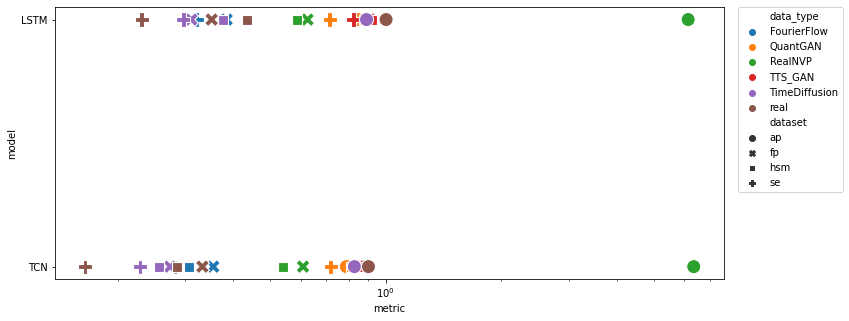

In [7]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot(x=results_agg["test"].rename("metric"), y=results_agg["model"], 
    hue=results_agg["results_type"].rename("data_type"), style=results_agg["dataset"], s=200, ax=ax)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xscale("log")
plt.show()

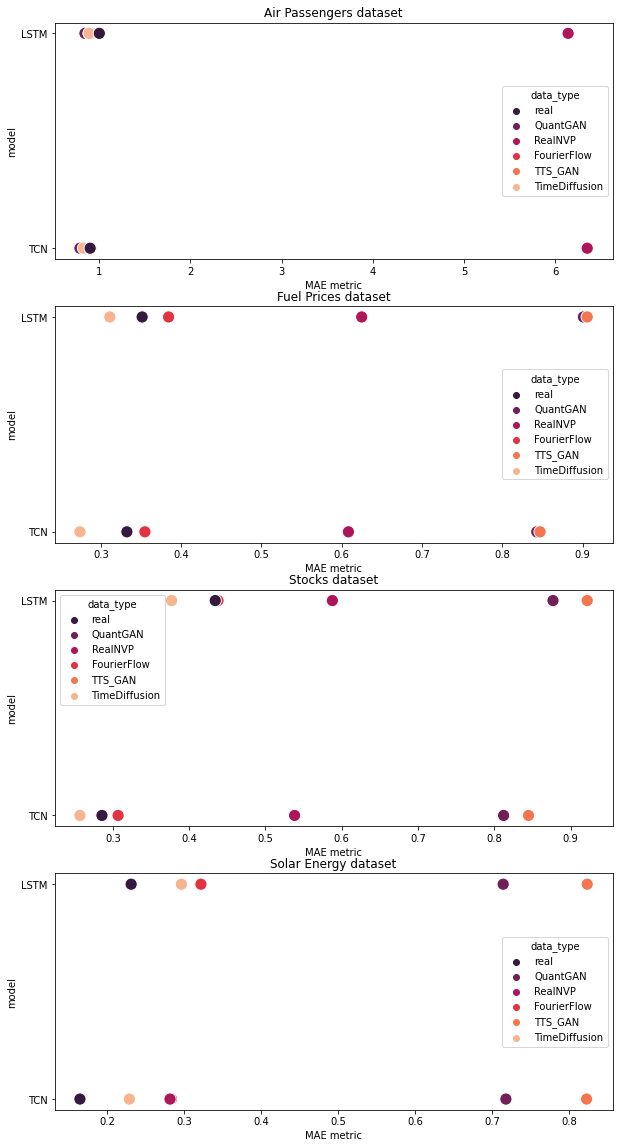

In [8]:
fig, axs = plt.subplots(4, figsize=(10, 20))
for i, dataset_name in enumerate(results_agg.dataset.unique()):
    loc_res = results_agg[results_agg.dataset == dataset_name]
    sns.scatterplot(x=loc_res["test"].rename("MAE metric"), y=loc_res["model"], hue=loc_res["results_type"].rename("data_type"),
     hue_order=("real", "QuantGAN", "RealNVP", "FourierFlow", "TTS_GAN", "TimeDiffusion"), ax=axs[i], s=150, palette="rocket")
    axs[i].set_title({"hsm": "Stocks", "se": "Solar Energy", "fp": "Fuel Prices", "ap": "Air Passengers"}[dataset_name] + " dataset")

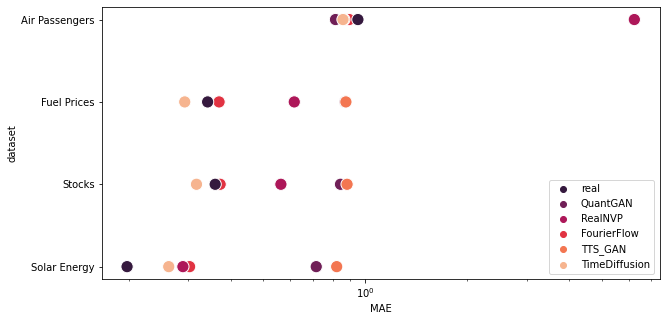

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
advanced_results_agg = results_agg.groupby(["dataset", "results_type"], as_index=False).agg(MAE=("test", "mean"))
sns.scatterplot(data=advanced_results_agg, x="MAE", y=advanced_results_agg["dataset"]\
    .replace({"hsm": "Stocks", "se": "Solar Energy", "fp": "Fuel Prices", "ap": "Air Passengers"}),\
    hue="results_type",\
    hue_order=("real", "QuantGAN", "RealNVP", "FourierFlow", "TTS_GAN", "TimeDiffusion"), ax=ax, s=150, palette="rocket")
ax.legend(bbox_to_anchor=(0.99, 0.02), loc='lower right', borderaxespad=0)
plt.xscale("log")
plt.show()

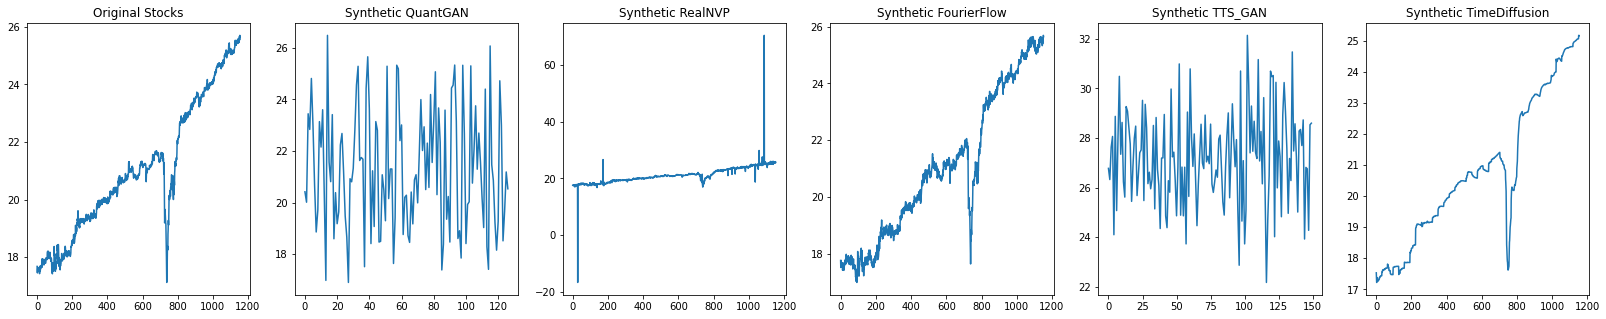

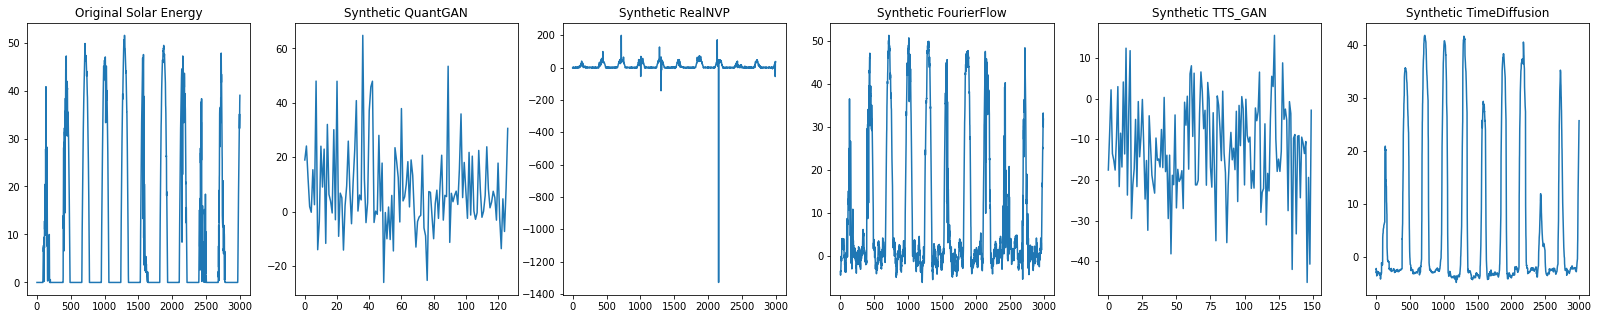

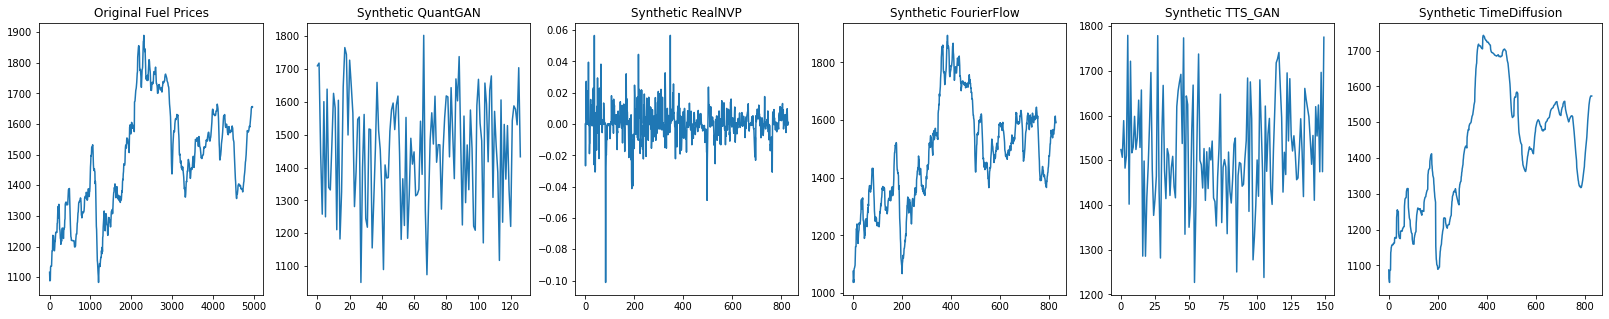

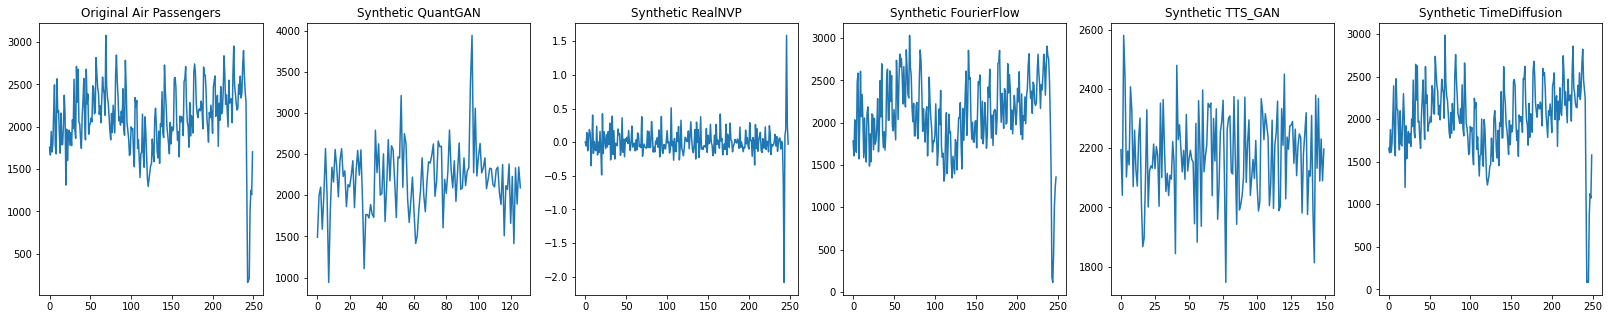

In [10]:
for dataset_name, dataset_dir, dataset_func in (
    ("Stocks", hsm_dataset_dir, get_hsm_dataset),
    ("Solar Energy", se_dataset_dir, get_solar_energy_dataset),
    ("Fuel Prices", fp_dataset_dir, get_fuel_prices_dataset),
    ("Air Passengers", ap_dataset_dir, get_passengers_dataset),    
):
    if dataset_name == "Stocks":
        time_series = next(dataset_func(dataset_dir, dataset_dir / "selected100.csv"))
    else:
        time_series = next(dataset_func(dataset_dir))

    fig, axs = plt.subplots(1, 6, figsize=(28, 5))
    axs[0].plot(time_series)
    axs[0].set_title(f"Original {dataset_name}")
    # axs[0].get_xaxis().set_visible(False)
    # axs[0].get_yaxis().set_visible(False)
    for i, model_name in zip(range(1, 6), ("QuantGAN", "RealNVP", "FourierFlow", "TTS_GAN", "TimeDiffusion")):
        synth_time_series = np.load(dataset_dir / f"synthetic/{model_name}/selected0.npy")
        axs[i].plot(synth_time_series[- 1].flatten())
        axs[i].set_title(f"Synthetic {model_name}")
        # axs[i].get_xaxis().set_visible(False)
        # axs[i].get_yaxis().set_visible(False)
plt.show()

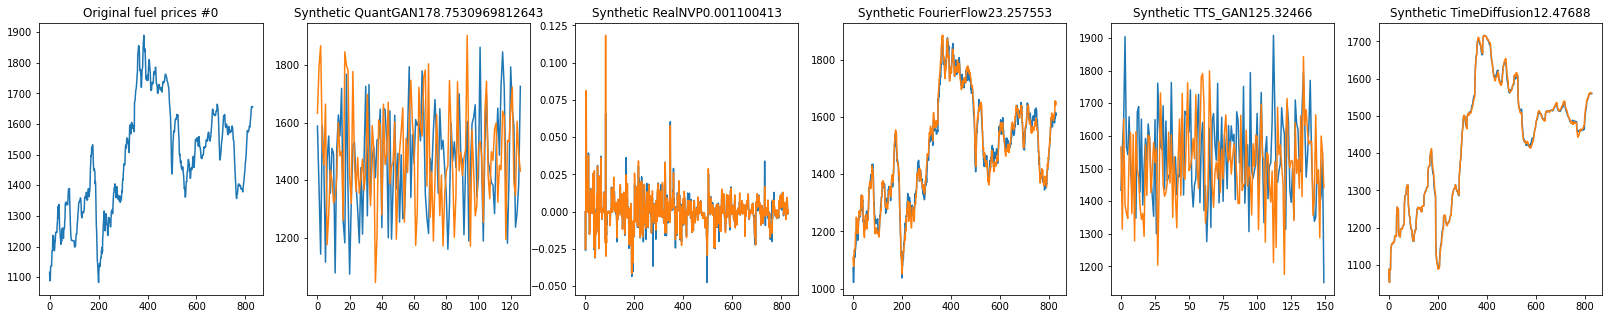

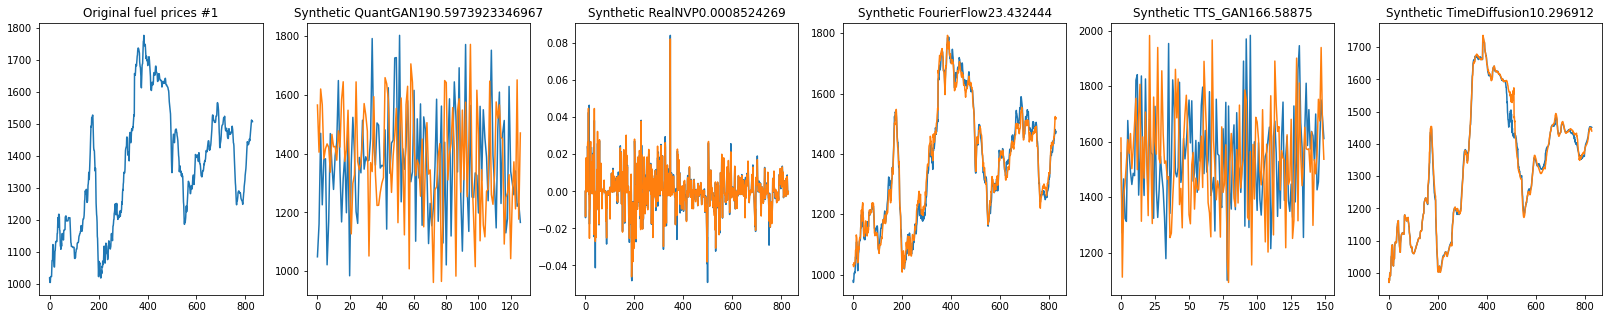

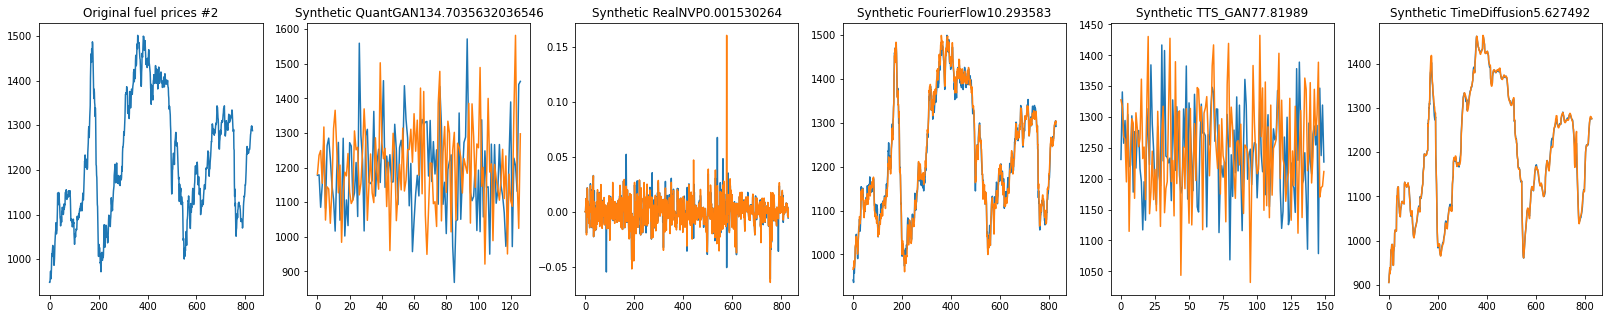

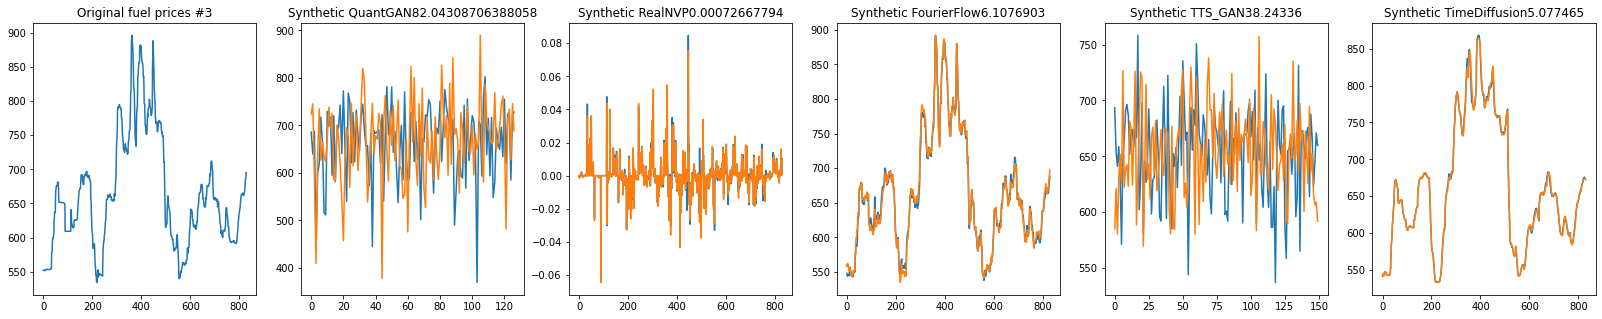

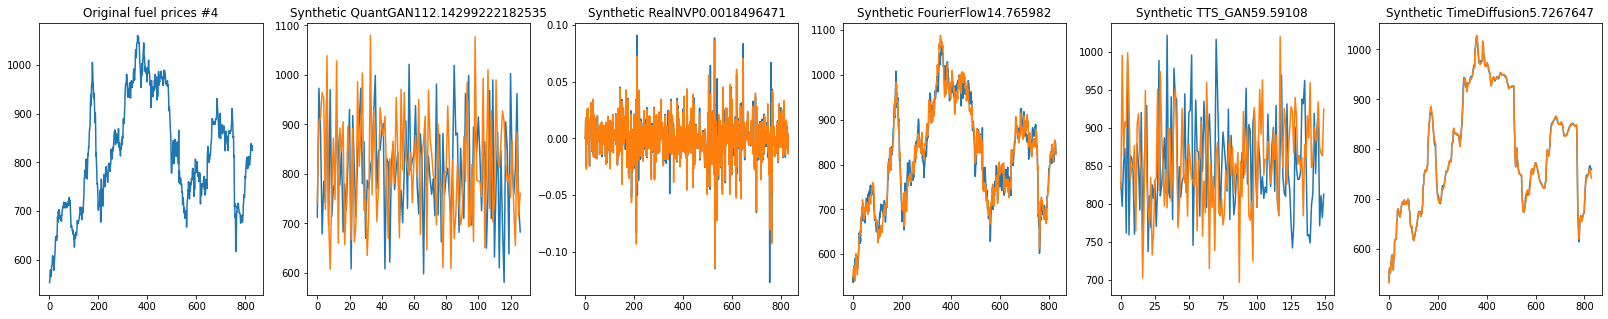

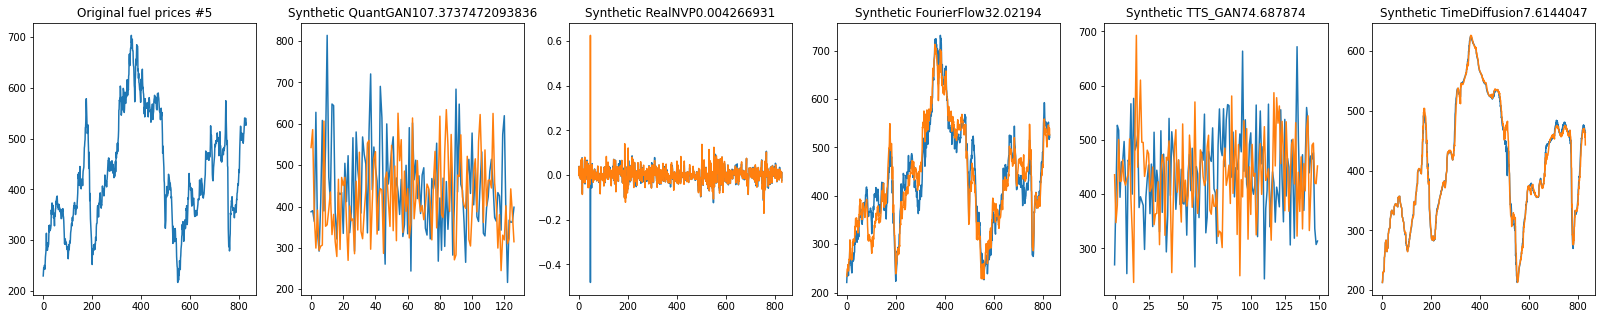

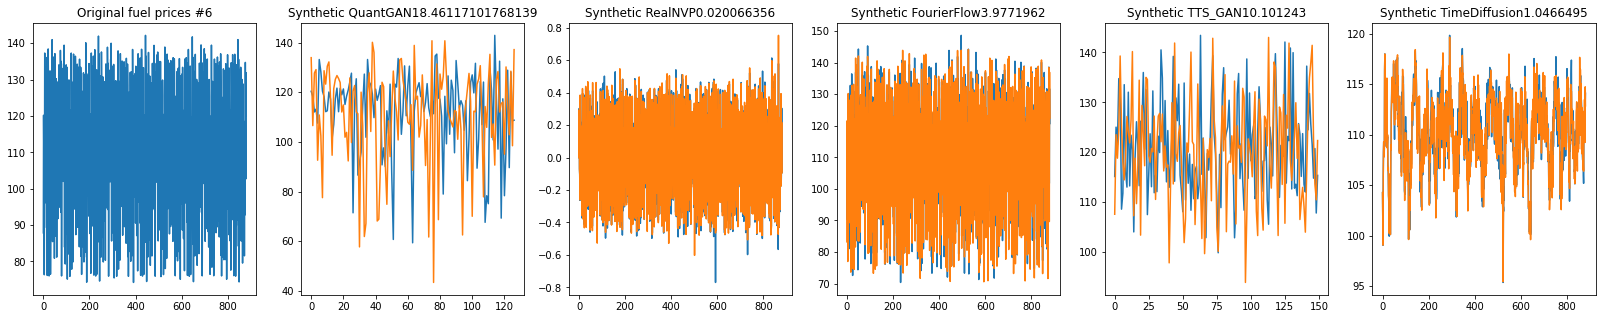

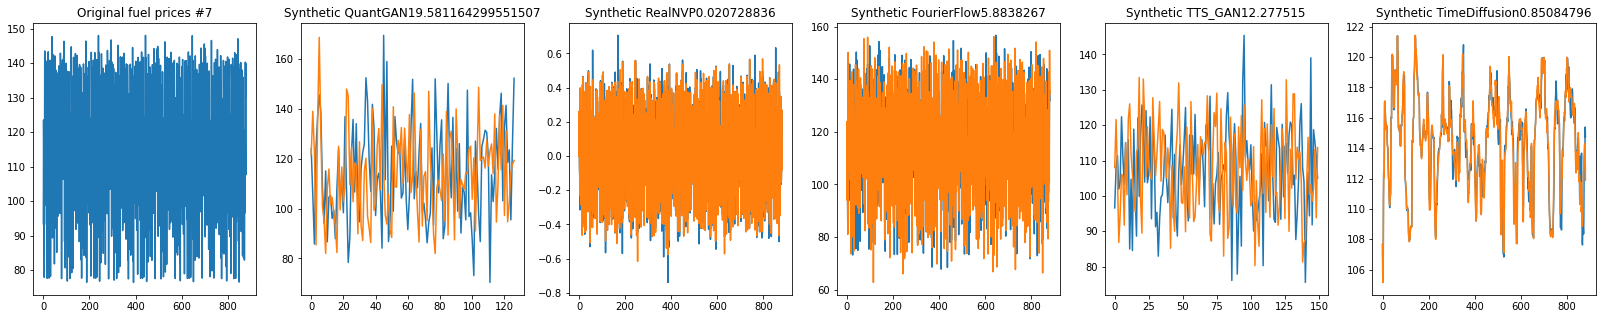

In [10]:
ts_iterator = get_fuel_prices_dataset(fp_dataset_dir)

for ts_index, time_series in enumerate(ts_iterator):
    fig, axs = plt.subplots(1, 6, figsize=(28, 5))
    axs[0].plot(time_series.values.flatten())
    axs[0].set_title(f"Original fuel prices #{ts_index}")
    # axs[0].get_xaxis().set_visible(False)
    # axs[0].get_yaxis().set_visible(False)
    for i, model_name in zip(range(1, 6), ("QuantGAN", "RealNVP", "FourierFlow", "TTS_GAN", "TimeDiffusion")):
        synth_time_series = np.load(fp_dataset_dir / f"synthetic/{model_name}/selected{ts_index}.npy")
        axs[i].plot(synth_time_series[0].flatten())
        axs[i].plot(synth_time_series[1].flatten())
        axs[i].set_title(f"Synthetic {model_name}" + str(synth_time_series.std(axis=0).mean()))
        # axs[i].get_xaxis().set_visible(False)
        # axs[i].get_yaxis().set_visible(False)
plt.show()

# Synthetic similarity results

In [12]:
ds_lens = {"hsm": 100, "se": 30, "fp": 8, "ap": 50}

In [13]:
results = []
for model in ("QuantGAN", "TTS_GAN", "RealNVP", "FourierFlow", "TimeDiffusion"):
    for dataset_name in ("hsm", "se", "fp", "ap"):
        df = pd.read_csv(results_dir / f"synth_{dataset_name}_sim_{model}.csv")[:ds_lens[dataset_name]]
        results.append({"model": model, "dataset": dataset_name,
        "kl_div": df["kl_div"].mean(), "kstest_pass": (df["kstest_pval"] > 0.05).mean()})
synth_sim_results = pd.DataFrame(results)
synth_sim_results

,model,dataset,kl_div,kstest_pass
0,QuantGAN,hsm,21.909068,0.010
1,QuantGAN,se,8.824737,0.000
2,QuantGAN,fp,15.738731,0.250
3,QuantGAN,ap,4223.509422,0.460
4,TTS_GAN,hsm,11.696616,0.010
5,TTS_GAN,se,6.415307,0.000
6,TTS_GAN,fp,13.111345,0.000
7,TTS_GAN,ap,2286.791598,0.140
8,RealNVP,hsm,0.669338,0.980
9,RealNVP,se,0.817298,0.000


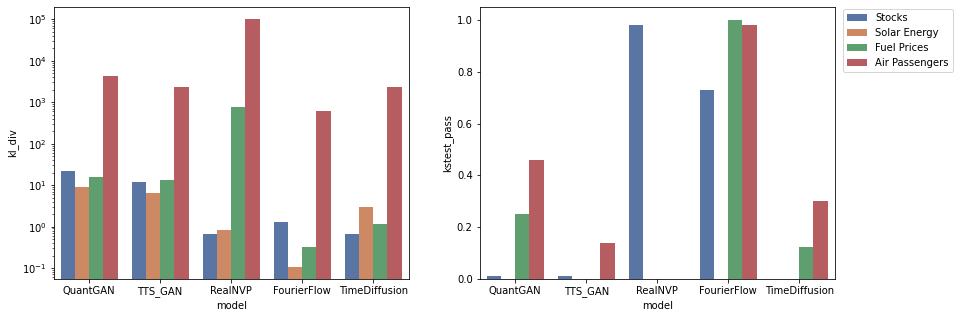

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
for i, metric_name in enumerate(("kl_div", "kstest_pass")):
    if metric_name == "kstest_pval":
        synth_sim_results
    sns.barplot(x=synth_sim_results["model"], y=synth_sim_results[metric_name], 
        hue=synth_sim_results["dataset"].replace({"hsm": "Stocks", "se": "Solar Energy", "fp": "Fuel Prices", "ap": "Air Passengers"}),\
             ax=axs[i], palette="deep")
axs[0].set_yscale("log")
axs[0].get_legend().remove()
axs[1].legend(bbox_to_anchor=(1.01, 1.01))
# axs[1].plot(axs[1].get_xbound(), [0.05] * 2, "k--")
plt.show()

In [14]:
dfs = {}
for res_type in ("real", "QuantGAN", "TTS_GAN", "RealNVP", "FourierFlow", "TimeDiffusion"):
    for model in ("LSTM", "TCN"):
        for dataset_name in ("hsm", "se", "fp", "ap"):
            if res_type == "real":
                dfs[f"{res_type}_{model}_{dataset_name}"] = pd.read_csv(results_dir / f"{res_type}_{dataset_name}_{model}.csv")["test"]
            else:
                dfs[f"{res_type}_{model}_{dataset_name}"] = pd.read_csv(results_dir / f"synth_{res_type}_{dataset_name}_{model}.csv")["test"]
results = pd.DataFrame(dfs)
results

,real_LSTM_hsm,real_LSTM_se,real_LSTM_fp,real_LSTM_ap,real_TCN_hsm,real_TCN_se,real_TCN_fp,real_TCN_ap,QuantGAN_LSTM_hsm,QuantGAN_LSTM_se,...,FourierFlow_TCN_fp,FourierFlow_TCN_ap,TimeDiffusion_LSTM_hsm,TimeDiffusion_LSTM_se,TimeDiffusion_LSTM_fp,TimeDiffusion_LSTM_ap,TimeDiffusion_TCN_hsm,TimeDiffusion_TCN_se,TimeDiffusion_TCN_fp,TimeDiffusion_TCN_ap
0,0.352968,0.229190,0.202559,0.795698,0.260205,0.164463,0.166383,0.723236,0.899521,0.810919,...,0.202846,0.711581,0.231638,0.270302,0.128603,0.726767,0.162253,0.217345,0.120391,0.706733
1,0.168099,0.184468,0.143776,0.625052,0.152844,0.154996,0.156278,0.601431,0.818553,0.851143,...,0.168418,0.628996,0.135717,0.186384,0.135676,0.428658,0.099733,0.148355,0.130920,0.422030
2,1.425858,0.200026,0.268309,0.082674,0.939176,0.153016,0.208905,0.080697,0.858767,0.657445,...,0.216392,0.277708,1.187328,0.216727,0.235294,0.100925,0.843008,0.176726,0.184589,0.098521
3,0.139445,0.230832,0.164236,0.464227,0.068642,0.153229,0.138380,0.504273,0.857949,0.781324,...,0.173286,0.499886,0.091193,0.303539,0.187444,0.381673,0.066569,0.240410,0.157767,0.419429
4,0.283939,0.207224,0.229799,0.884233,0.137041,0.147176,0.233753,0.944198,0.940779,0.824840,...,0.244187,1.016143,0.362482,0.245566,0.200696,0.724619,0.150311,0.183613,0.187752,0.749508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.311294,NaN,NaN,NaN,0.252606,NaN,NaN,NaN,1.005319,NaN,...,NaN,NaN,0.182589,NaN,NaN,NaN,0.170941,NaN,NaN,NaN
96,0.228035,NaN,NaN,NaN,0.247496,NaN,NaN,NaN,0.964678,NaN,...,NaN,NaN,0.286388,NaN,NaN,NaN,0.206710,NaN,NaN,NaN
97,0.502270,NaN,NaN,NaN,0.060227,NaN,NaN,NaN,0.897746,NaN,...,NaN,NaN,0.178901,NaN,NaN,NaN,0.062884,NaN,NaN,NaN
98,1.980303,NaN,NaN,NaN,0.266872,NaN,NaN,NaN,0.928570,NaN,...,NaN,NaN,1.517428,NaN,NaN,NaN,0.289896,NaN,NaN,NaN


In [15]:
corrs = []
for model in ("LSTM", "TCN"):
    for res_type in ("QuantGAN", "TTS_GAN", "RealNVP", "FourierFlow", "TimeDiffusion"):
        for dataset_name in ("hsm", "se", "fp", "ap"):
            # correlation
            res = np.corrcoef([results[f"real_{model}_{dataset_name}"][:ds_lens[dataset_name]],
                results[f"{res_type}_{model}_{dataset_name}"][:ds_lens[dataset_name]]])[0][1]
            z = 0.5 * np.log((1 + res) / (1 - res))
            SE =  1 / (ds_lens[dataset_name] - 3) ** 0.5
            zl, zh = z - 1.96 * SE, z + 1.96 * SE
            lb, hb = ((np.e ** (2 * zl) - 1) / (np.e ** (2 * zl) + 1), (np.e ** (2 * zh) - 1) / (np.e ** (2 * zh) + 1))
            corrs.append({"model": model, "synth_model": res_type, "dataset": dataset_name, "correlation": res,\
                "low_bound": lb, "high_bound": hb})
corrs = pd.DataFrame(corrs)
corrs

,model,synth_model,dataset,correlation,low_bound,high_bound
0,LSTM,QuantGAN,hsm,0.069925,-0.128258,0.262738
1,LSTM,QuantGAN,se,0.221561,-0.150748,0.538825
2,LSTM,QuantGAN,fp,-0.398002,-0.861159,0.426218
3,LSTM,QuantGAN,ap,-0.125052,-0.389835,0.158829
4,LSTM,TTS_GAN,hsm,-0.071949,-0.264630,0.126257
5,LSTM,TTS_GAN,se,-0.205279,-0.526608,0.167375
6,LSTM,TTS_GAN,fp,-0.318438,-0.835610,0.497991
7,LSTM,TTS_GAN,ap,-0.109112,-0.376044,0.174541
8,LSTM,RealNVP,hsm,0.739821,0.635791,0.817453
9,LSTM,RealNVP,se,0.801659,0.620634,0.901550


In [16]:
corrs_agg = corrs.groupby(["dataset", "synth_model"], as_index=False).mean()
corrs_agg

C:\Users\Владислав\AppData\Local\Temp/ipykernel_17788/2987291452.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  corrs_agg = corrs.groupby(["dataset", "synth_model"], as_index=False).mean()


,dataset,synth_model,correlation,low_bound,high_bound
0,ap,FourierFlow,0.875537,0.789785,0.927745
1,ap,QuantGAN,-0.151506,-0.412305,0.132227
2,ap,RealNVP,0.165381,-0.118422,0.424205
3,ap,TTS_GAN,-0.130265,-0.394217,0.153530
4,ap,TimeDiffusion,0.903448,0.835450,0.944251
5,fp,FourierFlow,0.997650,0.986520,0.999592
6,fp,QuantGAN,-0.486970,-0.886039,0.321451
7,fp,RealNVP,0.797682,0.212785,0.961743
8,fp,TTS_GAN,-0.156580,-0.768812,0.602659
9,fp,TimeDiffusion,0.995197,0.972608,0.999166


<AxesSubplot:xlabel='synth_model', ylabel='correlation'>

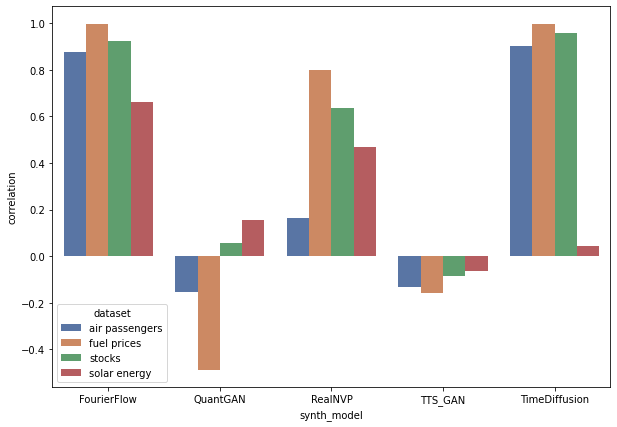

In [17]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(x=corrs_agg["synth_model"], y=corrs_agg["correlation"],\
    hue=corrs_agg["dataset"].replace({"se": "solar energy", "hsm": "stocks", "fp": "fuel prices", "ap": "air passengers"}), \
        ax=ax, palette="deep")

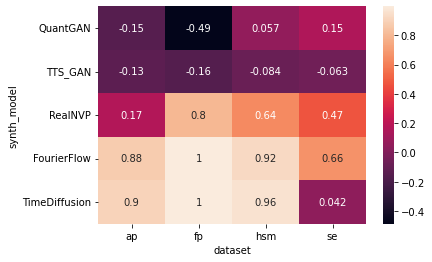

In [18]:
sns.heatmap(
    corrs_agg.pivot_table(index="synth_model", columns="dataset", values="correlation", aggfunc=np.mean).sort_values("ap"),
    annot=True
)
plt.show()

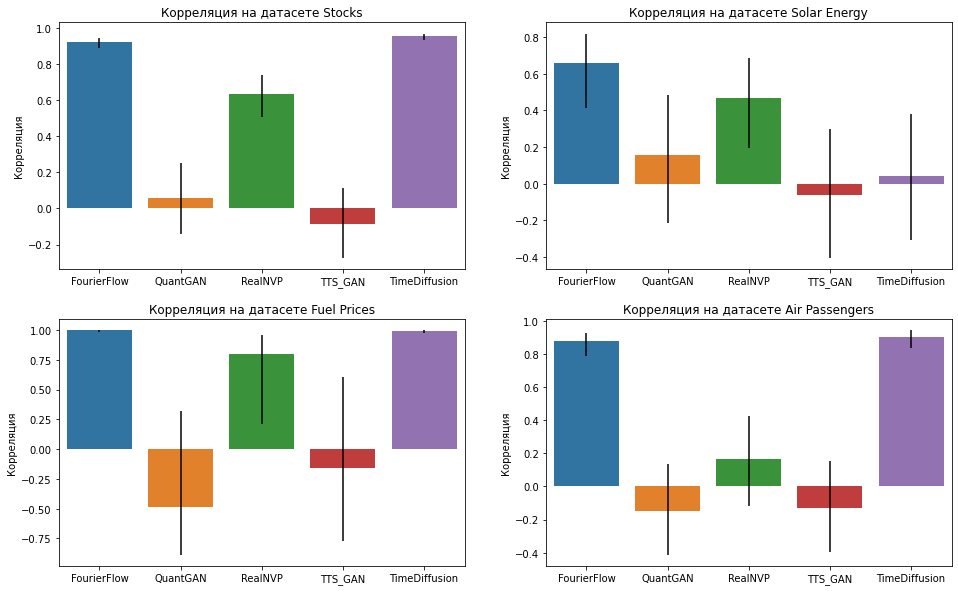

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
for i, dsname in enumerate(("hsm", "se", "fp", "ap")):
    loc_data = corrs_agg[corrs_agg.dataset == dsname]
    sns.barplot(data=loc_data, x="synth_model", y="correlation",\
        yerr=(loc_data["correlation"] - loc_data["low_bound"], loc_data["high_bound"] - loc_data["correlation"]), ax=axs[i // 2][i % 2])
    axs[i // 2][i % 2].set_title("Корреляция на датасете " + {"se": "Solar Energy", "hsm": "Stocks", "fp": "Fuel Prices", "ap": "Air Passengers"}[dsname])
    axs[i // 2][i % 2].set_xlabel("")
    axs[i // 2][i % 2].set_ylabel("Корреляция")

Deviation

In [20]:
devs = []  # deviation
for model in ("LSTM", "TCN"):
    for res_type in ("QuantGAN", "TTS_GAN", "RealNVP", "FourierFlow", "TimeDiffusion"):
        for dataset_name in ("hsm", "se", "fp", "ap"):
            # deviation
            dev = np.mean(np.abs(results[f"{res_type}_{model}_{dataset_name}"][:ds_lens[dataset_name]] /\
                results[f"real_{model}_{dataset_name}"][:ds_lens[dataset_name]] - 1)) * 100
            devs.append({"model": model, "synth_model": res_type, "dataset": dataset_name, "deviation": dev,})
devs = pd.DataFrame(devs)
devs

,model,synth_model,dataset,deviation
0,LSTM,QuantGAN,hsm,330.209970
1,LSTM,QuantGAN,se,213.344014
2,LSTM,QuantGAN,fp,265.912175
3,LSTM,QuantGAN,ap,51.917864
4,LSTM,TTS_GAN,hsm,373.759342
5,LSTM,TTS_GAN,se,262.911358
6,LSTM,TTS_GAN,fp,266.651272
7,LSTM,TTS_GAN,ap,55.266286
8,LSTM,RealNVP,hsm,53.855794
9,LSTM,RealNVP,se,27.859290


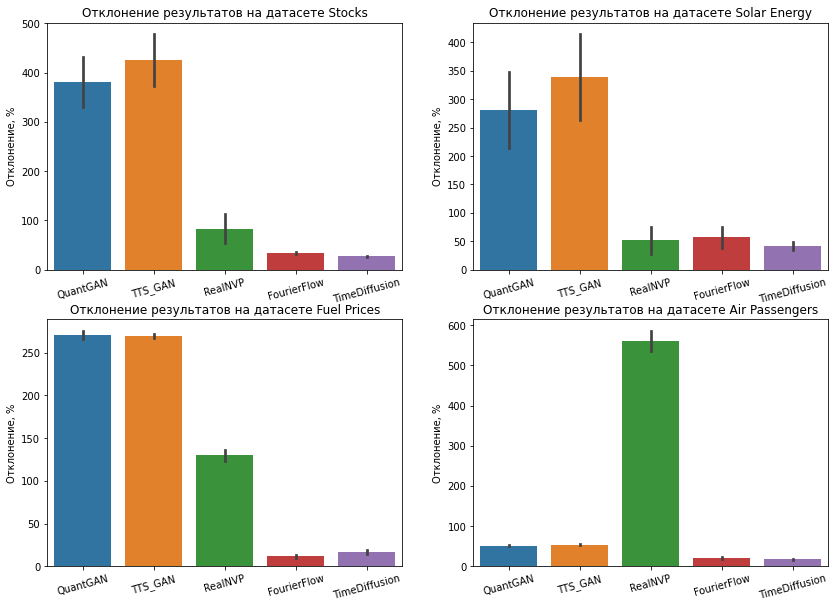

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
ds_name_extension = {"se": "Solar Energy", "hsm": "Stocks", "fp": "Fuel Prices", "ap": "Air Passengers"}
for i, dataset in enumerate(("hsm", "se", "fp", "ap")):
    sns.barplot(data=devs[devs.dataset == dataset], x="synth_model", y="deviation", ax=axs[i // 2][i % 2])
    axs[i // 2][i % 2].set_title(f"Отклонение результатов на датасете {ds_name_extension[dataset]}")
    axs[i // 2][i % 2].set_ylabel("Отклонение, %")
    axs[i // 2][i % 2].set_xlabel("")
    axs[i // 2][i % 2].set_xticklabels(axs[i // 2][i % 2].get_xticklabels(), rotation=15)